# Import Library

In [6]:
! pip install kaggle

In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import os
import shutil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import cv2

In [8]:
shutil.rmtree('data', ignore_errors=True)

# Gathering Data

In [9]:
! mkdir data

## Download Dataset from Kaggle

### Initialize Kaggle

In [10]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


### Download shayanriyaz Dataset
Classes (train:val) : BrownSpot (418:105), Healthy (1191:297), Hispa (452:113), LeafBlast (623:156)

In [11]:
! kaggle datasets download -d shayanriyaz/riceleafs
! mkdir data/shayanriyaz
! unzip riceleafs.zip -d data/shayanriyaz
os.remove('riceleafs.zip')

Streaming output truncated to the last 5000 lines.
  inflating: data/shayanriyaz/RiceLeafs/train/Hispa/IMG_20190419_144628.jpg  
  inflating: data/shayanriyaz/RiceLeafs/train/Hispa/IMG_20190419_144631.jpg  
  inflating: data/shayanriyaz/RiceLeafs/train/Hispa/IMG_20190419_144637.jpg  
  inflating: data/shayanriyaz/RiceLeafs/train/Hispa/IMG_20190419_144641.jpg  
  inflating: data/shayanriyaz/RiceLeafs/train/Hispa/IMG_20190419_144645.jpg  
  inflating: data/shayanriyaz/RiceLeafs/train/Hispa/IMG_20190419_144647.jpg  
  inflating: data/shayanriyaz/RiceLeafs/train/Hispa/IMG_20190419_144651.jpg  
  inflating: data/shayanriyaz/RiceLeafs/train/Hispa/IMG_20190419_144654.jpg  
  inflating: data/shayanriyaz/RiceLeafs/train/Hispa/IMG_20190419_144656.jpg  
  inflating: data/shayanriyaz/RiceLeafs/train/Hispa/IMG_20190419_144658.jpg  
  inflating: data/shayanriyaz/RiceLeafs/train/Hispa/IMG_20190419_144730.jpg  
  inflating: data/shayanriyaz/RiceLeafs/train/Hispa/IMG_20190419_144733.jpg  
  inflating: 

### Download chandrug Dataset
Classes : Leaf smut (40), Brown spot (40), Blast (80), Blight (80), Tungro (80)

In [12]:
! kaggle datasets download -d chandrug/riceleafdisease
! mkdir data/chandrug
! unzip riceleafdisease.zip -d data/chandrug
os.remove('riceleafdisease.zip')

 93% 39.0M/41.8M [00:00<00:00, 208MB/s]
100% 41.8M/41.8M [00:00<00:00, 203MB/s]
Archive:  riceleafdisease.zip
  inflating: data/chandrug/rice-leaf-disease/Brown spot/Brown_spot_0.jpg  
  inflating: data/chandrug/rice-leaf-disease/Brown spot/Brown_spot_1.jpg  
  inflating: data/chandrug/rice-leaf-disease/Brown spot/Brown_spot_10.jpg  
  inflating: data/chandrug/rice-leaf-disease/Brown spot/Brown_spot_11.jpg  
  inflating: data/chandrug/rice-leaf-disease/Brown spot/Brown_spot_12.jpg  
  inflating: data/chandrug/rice-leaf-disease/Brown spot/Brown_spot_13.jpg  
  inflating: data/chandrug/rice-leaf-disease/Brown spot/Brown_spot_14.jpg  
  inflating: data/chandrug/rice-leaf-disease/Brown spot/Brown_spot_15.jpg  
  inflating: data/chandrug/rice-leaf-disease/Brown spot/Brown_spot_16.jpg  
  inflating: data/chandrug/rice-leaf-disease/Brown spot/Brown_spot_17.jpg  
  inflating: data/chandrug/rice-leaf-disease/Brown spot/Brown_spot_18.jpg  
  inflating: data/chandrug/rice-leaf-disease/Brown spot/

### Download tedisetiady Dataset
Classes : Blast (80), Blight (80), Tungro (80)

In [13]:
! kaggle datasets download -d tedisetiady/leaf-rice-disease-indonesia
! mkdir data/tedisetiady
! unzip leaf-rice-disease-indonesia.zip -d data/tedisetiady
os.remove('leaf-rice-disease-indonesia.zip')

 79% 17.0M/21.6M [00:00<00:00, 176MB/s]
100% 21.6M/21.6M [00:00<00:00, 187MB/s]
Archive:  leaf-rice-disease-indonesia.zip
  inflating: data/tedisetiady/blast/IMG_0448.jpg  
  inflating: data/tedisetiady/blast/IMG_0535.jpg  
  inflating: data/tedisetiady/blast/IMG_0536.jpg  
  inflating: data/tedisetiady/blast/IMG_0541.jpg  
  inflating: data/tedisetiady/blast/IMG_0543.jpg  
  inflating: data/tedisetiady/blast/IMG_0544.jpg  
  inflating: data/tedisetiady/blast/IMG_0545.jpg  
  inflating: data/tedisetiady/blast/IMG_0546.jpg  
  inflating: data/tedisetiady/blast/IMG_0547.jpg  
  inflating: data/tedisetiady/blast/IMG_0548.jpg  
  inflating: data/tedisetiady/blast/IMG_0549.jpg  
  inflating: data/tedisetiady/blast/IMG_0550.jpg  
  inflating: data/tedisetiady/blast/IMG_0551.jpg  
  inflating: data/tedisetiady/blast/IMG_0553.jpg  
  inflating: data/tedisetiady/blast/IMG_0557.jpg  
  inflating: data/tedisetiady/blast/IMG_0558.jpg  
  inflating: data/tedisetiady/blast/IMG_0559.jpg  
  inflating

### Download vbookshelf Dataset
Classes : Leaf smut (40), Brown spot (40), Blight (40)

In [14]:
! kaggle datasets download -d vbookshelf/rice-leaf-diseases
! mkdir data/vbookshelf
! unzip rice-leaf-diseases.zip -d data/vbookshelf
os.remove('rice-leaf-diseases.zip')

 52% 19.0M/36.7M [00:00<00:00, 195MB/s]
100% 36.7M/36.7M [00:00<00:00, 244MB/s]
Archive:  rice-leaf-diseases.zip
  inflating: data/vbookshelf/rice_leaf_diseases/Bacterial leaf blight/DSC_0365.JPG  
  inflating: data/vbookshelf/rice_leaf_diseases/Bacterial leaf blight/DSC_0366.jpg  
  inflating: data/vbookshelf/rice_leaf_diseases/Bacterial leaf blight/DSC_0367.JPG  
  inflating: data/vbookshelf/rice_leaf_diseases/Bacterial leaf blight/DSC_0370.jpg  
  inflating: data/vbookshelf/rice_leaf_diseases/Bacterial leaf blight/DSC_0372.JPG  
  inflating: data/vbookshelf/rice_leaf_diseases/Bacterial leaf blight/DSC_0373.JPG  
  inflating: data/vbookshelf/rice_leaf_diseases/Bacterial leaf blight/DSC_0374.JPG  
  inflating: data/vbookshelf/rice_leaf_diseases/Bacterial leaf blight/DSC_0375.JPG  
  inflating: data/vbookshelf/rice_leaf_diseases/Bacterial leaf blight/DSC_0376.JPG  
  inflating: data/vbookshelf/rice_leaf_diseases/Bacterial leaf blight/DSC_0377.JPG  
  inflating: data/vbookshelf/rice_lea

## Mixed Dataset

In [15]:
diseases = ("LeafSmut", "BrownSpot", "Blight", "Blast", "Tungro", "Hispa", "Healthy")
dataset_dir = 'data/mixed'
alldata_dir = 'data/mixed/alldata'

In [16]:
os.mkdir(dataset_dir)
os.mkdir(alldata_dir)
for disease in diseases:
  os.mkdir(os.path.join(alldata_dir, disease))

In [17]:
def copy_to_mixed_dataset(base_source_dir, source_list, target_list):
  for index, value in enumerate(source_list):
    dest_dir = os.path.join(alldata_dir, target_list[index])
    source_dir = os.path.join(base_source_dir, source_list[index])
    list_data = os.listdir(source_dir)

    for data in list_data:
      if data in os.listdir(dest_dir):
        continue
      source = os.path.join(source_dir, data)
      dest = os.path.join(dest_dir, data)
      shutil.copy(source, dest)

### Copy shayanriyaz Dataset

#### train dir

In [21]:
base_source_dir = 'data/shayanriyaz/RiceLeafs/train'
source_list = os.listdir(base_source_dir)
source_list.sort()
print("Directory source :", source_list)

Directory source : ['BrownSpot', 'Healthy', 'Hispa', 'LeafBlast']


In [23]:
target_list = ['BrownSpot', 'Healthy', 'Hispa', 'Blast']
print("Directory destination :", target_list)

Directory destination : ['BrownSpot', 'Healthy', 'Hispa', 'Blast']


In [24]:
copy_to_mixed_dataset(base_source_dir, source_list, target_list)

#### val dir

In [25]:
base_source_dir = 'data/shayanriyaz/RiceLeafs/validation'
source_list = os.listdir(base_source_dir)
source_list.sort()
print("Directory source :", source_list)

Directory source : ['BrownSpot', 'Healthy', 'Hispa', 'LeafBlast']


In [26]:
target_list = ['BrownSpot', 'Healthy', 'Hispa', 'Blast']
print("Directory destination :", target_list)

Directory destination : ['BrownSpot', 'Healthy', 'Hispa', 'Blast']


In [27]:
copy_to_mixed_dataset(base_source_dir, source_list, target_list)

### Copy chandrug Dataset

In [28]:
base_source_dir = 'data/chandrug/rice-leaf-disease'
source_list = os.listdir(base_source_dir)
source_list.sort()
print("Directory source :", source_list)

Directory source : ['Brown spot', 'Leaf smut', 'blast', 'blight', 'tungro']


In [29]:
target_list = ['BrownSpot', 'LeafSmut', 'Blast', 'Blight', 'Tungro']
print("Directory destination :", target_list)

Directory destination : ['BrownSpot', 'LeafSmut', 'Blast', 'Blight', 'Tungro']


In [30]:
copy_to_mixed_dataset(base_source_dir, source_list, target_list)

### Copy tedisetiady Dataset

In [31]:
base_source_dir = 'data/tedisetiady/'
source_list = os.listdir(base_source_dir)
source_list.sort()
print("Directory source :", source_list)

Directory source : ['blast', 'blight', 'tungro']


In [32]:
target_list = ['Blast', 'Blight', 'Tungro']
print("Directory destination :", target_list)

Directory destination : ['Blast', 'Blight', 'Tungro']


In [33]:
copy_to_mixed_dataset(base_source_dir, source_list, target_list)

### Copy vbookshelf Dataset

In [34]:
base_source_dir = 'data/vbookshelf/rice_leaf_diseases'
source_list = os.listdir(base_source_dir)
source_list.sort()
print("Directory source :", source_list)

Directory source : ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']


In [35]:
target_list = ['Blight', 'BrownSpot', 'LeafSmut']
print("Directory destination :", target_list)

Directory destination : ['Blight', 'BrownSpot', 'LeafSmut']


In [36]:
copy_to_mixed_dataset(base_source_dir, source_list, target_list)

## Result Mixed Dataset

In [37]:
print("Total data from each class disease:")
for disease in diseases:
  list_file = os.listdir(os.path.join(alldata_dir, disease))
  print('{}: {} images'.format(disease, len(list_file)))

Total data from each class disease:
LeafSmut: 80 images
BrownSpot: 603 images
Blight: 200 images
Blast: 939 images
Tungro: 160 images
Hispa: 565 images
Healthy: 1488 images


# Exploratory Data Analysis

show the data distribution

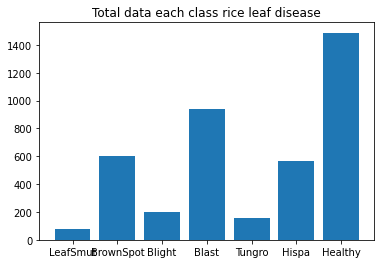

In [38]:
dict_diseases = {}

for disease in diseases:
  list_file = os.listdir(os.path.join(alldata_dir, disease))
  dict_diseases[disease] = len(list_file)

plt.figure(figsize=(6,4))
plt.bar(x=dict_diseases.keys(), height=dict_diseases.values())
plt.title("Total data each class rice leaf disease")
plt.show()

show example image


Hispa


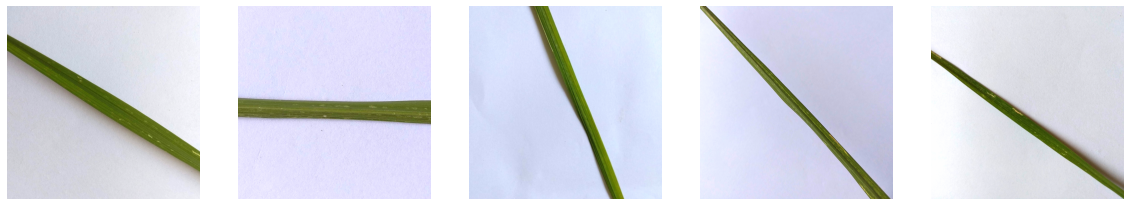


Tungro


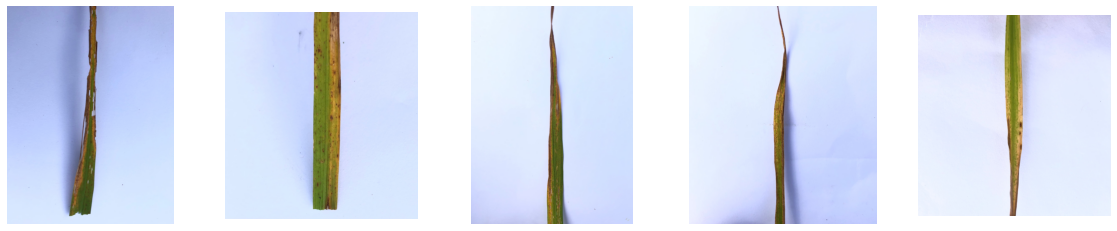


BrownSpot


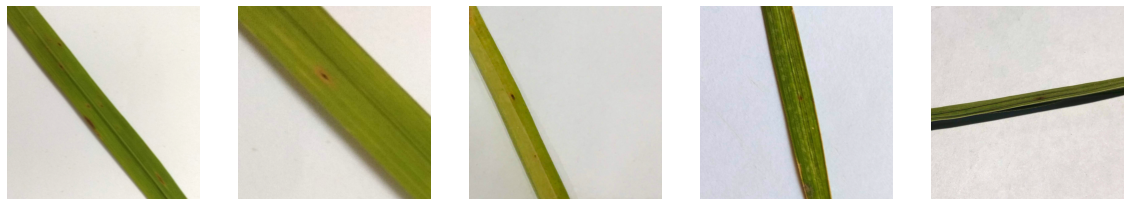


Blast


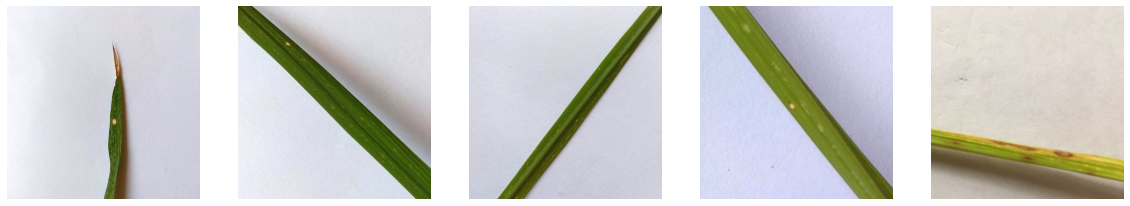


Blight


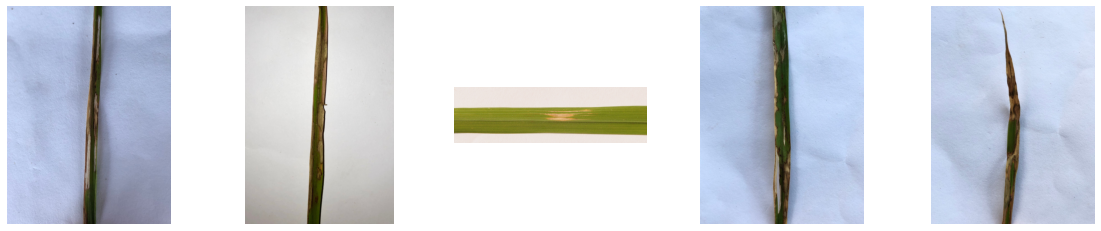


Healthy


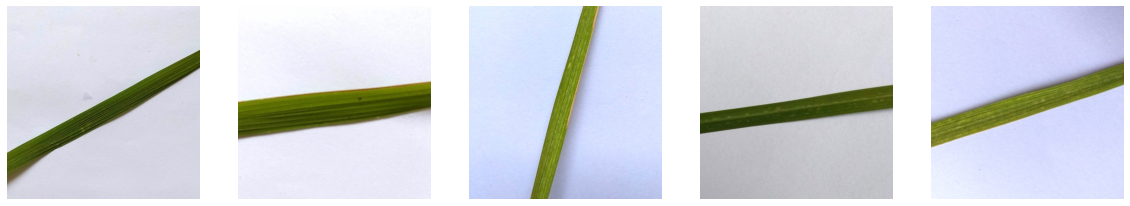


LeafSmut


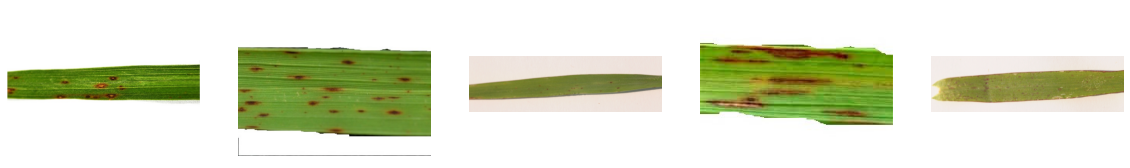

In [39]:
list_data_class = os.listdir(alldata_dir)
for item in list_data_class:
  print("")
  print(item)
  class_dir = os.path.join(alldata_dir, item)
  class_images = os.listdir(class_dir)
  plt.figure(figsize=(20, 4))
  for i, img_path in enumerate(class_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, img_path))
    plt.axis('off')
    plt.imshow(img)
  plt.show()

show minimum and maximum image dimension each class

In [40]:
list_data_class = os.listdir(alldata_dir)
for item in list_data_class:
  dir = os.path.join(alldata_dir, item)
  print(item)
  
  max_h, min_h, max_w, min_w = 0, 99999, 0, 99999

  for img_name in os.listdir(dir):
    img_path = os.path.join(dir, img_name)
    img = Image.open(img_path)
    
    w, h = img.size
    if w > max_w: max_w = w
    if w < min_w: min_w = w
    if h > max_h: max_h = h
    if h < min_h: min_h = h
  
  print("min width: {} , max width: {}".format(min_w, max_w))
  print("min height: {} , max height: {}".format(min_h, max_h))
  print("")

Hispa
min width: 877 , max width: 3120
min height: 877 , max height: 3120

Tungro
min width: 1313 , max width: 1970
min height: 1920 , max height: 1920

BrownSpot
min width: 286 , max width: 3120
min height: 88 , max height: 3120

Blast
min width: 734 , max width: 3120
min height: 734 , max height: 3120

Blight
min width: 1291 , max width: 3081
min height: 897 , max height: 1920

Healthy
min width: 826 , max width: 3120
min height: 826 , max height: 3120

LeafSmut
min width: 250 , max width: 4160
min height: 71 , max height: 2340



**Conclusion:**

data must be reproduced and resized for better data distribution

# Data Preprocessing & Augmentation

## Load image array and preprocessing image

In [123]:
def load_image_array(alldata_dir, disease):
  temp_dis_dir = os.path.join(alldata_dir, disease)
  temp_files = os.listdir(temp_dis_dir)
  temp_paths = [os.path.join(temp_dis_dir, file) for file in temp_files]
  temp_imgs = [read_image(file) for file in temp_paths]

  return np.array(temp_imgs)

def image_pixel_normalization(image):
  """
  transform image to same size without cropping the image
  e.g. image size : (200, 600) => (600, 600)
  """
  h, w, _ = image.shape

  norm_size = h if h > w else w
  
  add_h = norm_size - h
  add_w = norm_size - w 
  
  start_add_h = add_h // 2
  start_add_w = add_w // 2

  new_img = np.full((norm_size, norm_size, 3), 255, dtype=np.uint8)
  new_img[start_add_h:start_add_h + h, start_add_w:start_add_w + w, :] = image
  
  return new_img

def preprocessing(image):
  """
  preprocessing image including size normalization and resize image
  """
  img = image_pixel_normalization(image)
  img = cv2.resize(img, (512, 512), interpolation = cv2.INTER_AREA)
  return np.array(img)

def read_image(image_file):
  img = cv2.imread(image_file)
  img = preprocessing(img)
  return np.array(img)

In [95]:
disease_imgs = {}

for disease in diseases:
  disease_imgs[disease] = load_image_array(alldata_dir, disease) 

disease_imgs.keys()

dict_keys(['LeafSmut', 'BrownSpot', 'Blight', 'Blast', 'Tungro', 'Hispa', 'Healthy'])

In [96]:
disease_imgs['LeafSmut'].shape

(80, 256, 256, 3)

## Augmentating image

In [116]:
shutil.rmtree('data/mixed/finaldata', ignore_errors=True)

In [117]:
# save dir
finaldata_dir = "data/mixed/finaldata"

In [118]:
os.mkdir(finaldata_dir)
for disease in diseases:
  os.mkdir(os.path.join(finaldata_dir, disease))

### Initialized Image Data Generator Augmentation

In [119]:
datagen = ImageDataGenerator(
            rotation_range=60, # rotation
            width_shift_range=0.15, # horizontal shift
            height_shift_range=0.15, # vertical shift
            zoom_range=0.05, # zoom
            horizontal_flip=True, # horizontal flip
            vertical_flip=True, # vertical flip
            brightness_range=[0.75,1.25], # brightness
          )

def generate_image(datagen, data, amount, savepath=None):
  # prepare iterator
  it = datagen.flow(
        data, 
        batch_size=1, 
        save_to_dir=savepath,
        save_prefix='',
        save_format='png',
      )
  
  # generate samples and plot
  for i in range(amount):
    batch = it.next()
    image = batch[0].astype('uint8')

### Iterate all class diseases and generate new 1000 image data each class

In [120]:
diseases

('LeafSmut', 'BrownSpot', 'Blight', 'Blast', 'Tungro', 'Hispa', 'Healthy')

In [121]:
amount = 1000

for idx, disease in enumerate(diseases):
  leafSmut_path = os.path.join(finaldata_dir, disease)
  generate_image(datagen, disease_imgs[disease], amount, leafSmut_path)  

show result augmented image


Hispa


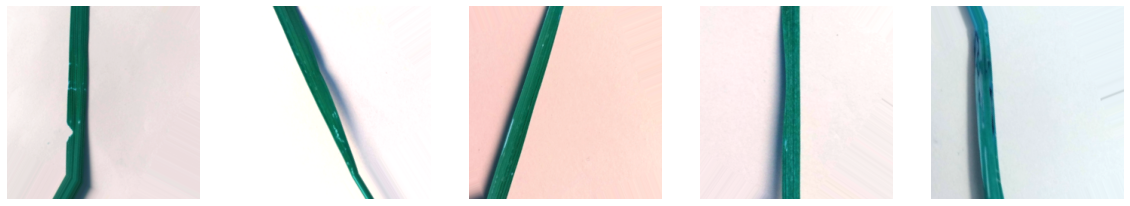


Tungro


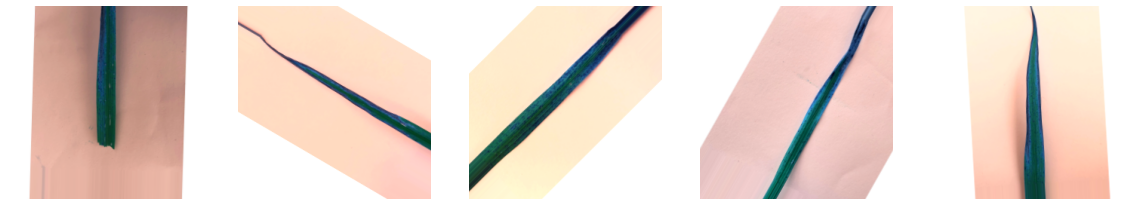


BrownSpot


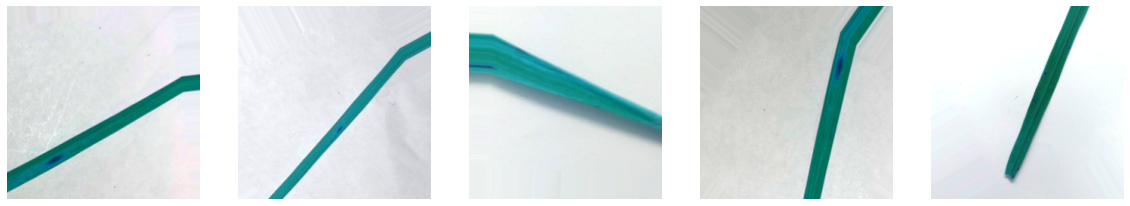


Blast


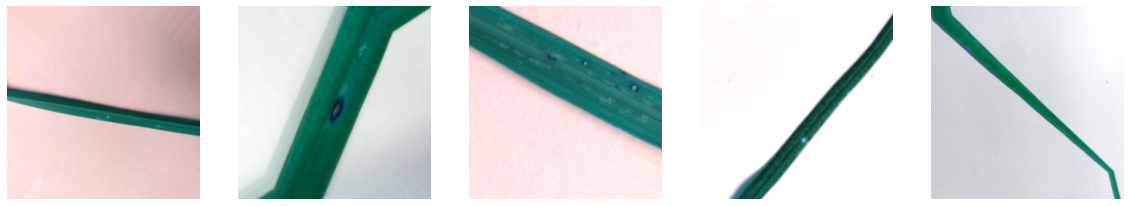


Blight


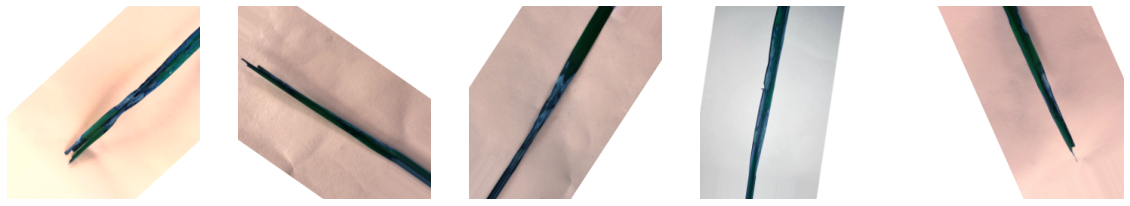


Healthy


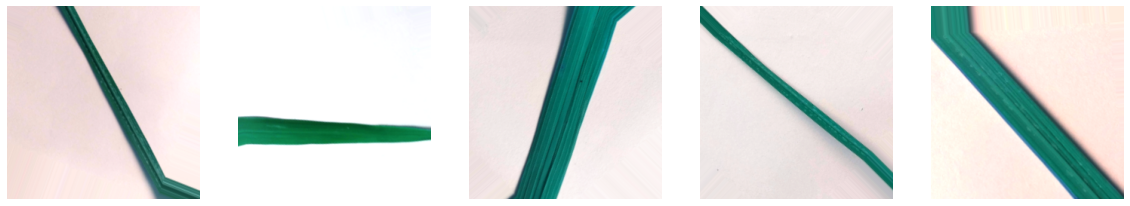


LeafSmut


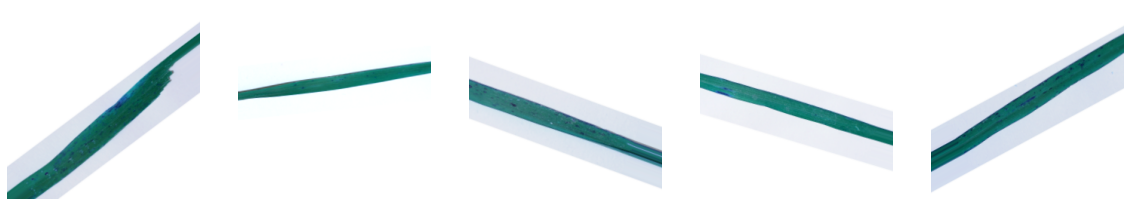

In [122]:
list_data_class = os.listdir(finaldata_dir)
for item in list_data_class:
  print("")
  print(item)
  class_dir = os.path.join(finaldata_dir, item)
  class_images = os.listdir(class_dir)
  plt.figure(figsize=(20, 4))
  for i, img_path in enumerate(class_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, img_path))
    plt.axis('off')
    plt.imshow(img)
  plt.show()